In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")



--2020-08-13 01:07:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-13 01:07:10 (118 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[ :i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len))

In [7]:
xs, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes= total_words)

array([  0,   0,   0,   0,   0,   0,  34, 417, 877, 166], dtype=int32)

In [9]:
len(corpus), max_sequence_len

(2159, 11)

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len -1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2)) # 수학적으로 증명된건 없음.. 그냥 잘 돼
model.add(LSTM(100))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
# history = model.fit()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [21]:
history = model.fit(xs, label, epochs = 100, verbose = 1 )

Epoch 1/100
484/484 [==============================] - 13s 26ms/step - loss: 6.9083 - accuracy: 0.0204
Epoch 2/100
484/484 [==============================] - 13s 26ms/step - loss: 6.5037 - accuracy: 0.0245
Epoch 3/100
484/484 [==============================] - 13s 26ms/step - loss: 6.4035 - accuracy: 0.0264
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 6.2827 - accuracy: 0.0310
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1962 - accuracy: 0.0338
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1149 - accuracy: 0.0384
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0365 - accuracy: 0.0397
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 5.9567 - accuracy: 0.0443
Epoch 9/100
484/484 [==============================] - 13s 26ms/step - loss: 5.8540 - accuracy: 0.0489
Epoch 10/100
484/484 [==============================] - 13s 26ms/step - l

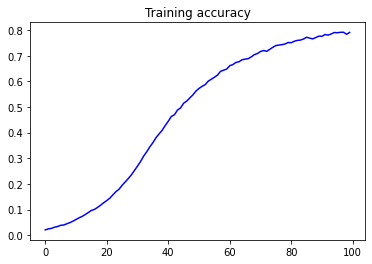

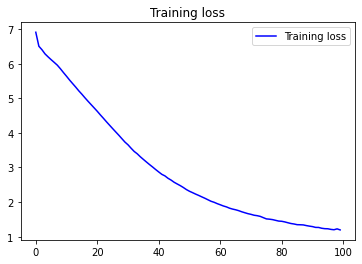

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [34]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1)
    predicted = model.predict_classes(token_list)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope wilt you doth stand true blind verse ' me again lend thee days lived o'er stand o'er moan desire away or thence mistaking strife achieve live days lies lies twain lies ' with me is see to art with new twain twain new make my monument ' lies new new new fled ' doth canopy the night of hell new painted moan me might thee o'er go ' did stand so true great part new new achieve decays ' with now remain twain twain ' lies nothing both twain twain 'will ' doth me doth 'will ' was to my
